In [236]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Convolution Function
def convolve(image, kernel):
    image_height, image_width, image_depth = image.shape
    kernel_height, kernel_width = kernel.shape

    output = np.zeros_like(image)
    for d in range(image_depth):
        for y in range(image_height - kernel_height):
            for x in range(image_width - kernel_width):
                matrix = image[y: y+kernel_height, x:x+kernel_width, d]
                output[y,x,d] = int(np.sum(np.multiply(matrix, kernel)))

    if(np.min(output) < 0):
        output = np.clip(output, 0, 255)

    return output

    


## Gaussian Blur

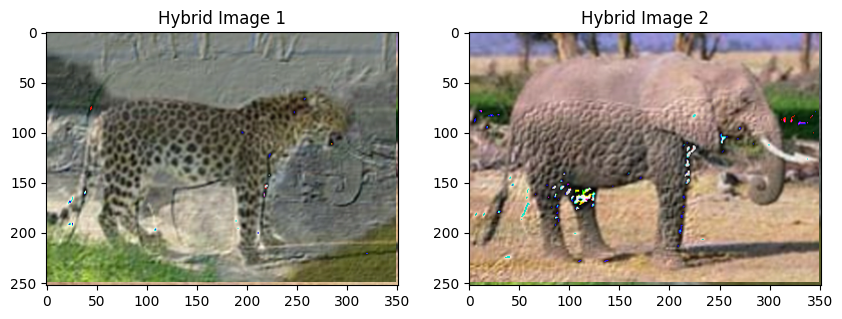

In [237]:
#Gaussian Blur

mimikyu = cv2.imread('./cheetah.png')
pikachu = cv2.imread('./elephant.png')
mimikyu = cv2.cvtColor(mimikyu, cv2.COLOR_BGR2RGB)
pikachu = cv2.cvtColor(pikachu, cv2.COLOR_BGR2RGB)

gaussian_est_kernel = 1/16 * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])


low_pass_pikachu = convolve(pikachu, gaussian_est_kernel)
high_pass_pikachu = pikachu - low_pass_pikachu

low_pass_mimikyu = convolve(mimikyu, gaussian_est_kernel)
high_pass_mimikyu = mimikyu - low_pass_mimikyu

hybrid_image_1 = low_pass_mimikyu + high_pass_pikachu
hybrid_image_2 = low_pass_pikachu + high_pass_mimikyu
# Display the hybrid images using Matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(hybrid_image_1)
ax[0].set_title('Hybrid Image 1')
ax[1].imshow(hybrid_image_2)
ax[1].set_title('Hybrid Image 2')
plt.show()
